In [1]:
import pandas as pd
from rouge import Rouge
import nltk
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

# Evaluating process

## Rouge

In [2]:
# Load Excel file
excel_file_path = 'C:/Users/crown/Desktop/ISE/praktikum docu/train_8/train_result_mistral_withoutkg.xlsx'
df = pd.read_excel(excel_file_path)

# Initialize ROUGE scorer
rouge = Rouge()

# Prepare columns to store ROUGE scores
rouge_columns = {
    "ROUGE-1-f": [],
    "ROUGE-1-p": [],
    "ROUGE-1-r": [],
    "ROUGE-2-f": [],
    "ROUGE-2-p": [],
    "ROUGE-2-r": [],
    "ROUGE-L-f": [],
    "ROUGE-L-p": [],
    "ROUGE-L-r": []
}

# Iterate through each row to calculate ROUGE scores
for index, row in df.iterrows():
    # Ensure Ground Truth and Predicted Answer are string types
    ground_truth = str(row['Ground Truth']) if not pd.isnull(row['Ground Truth']) else ""
    predicted_answer = str(row['answer_text']) if not pd.isnull(row['answer_text']) else ""
    
    # Skip the row if either field is empty
    if ground_truth == "" or predicted_answer == "":
        for key in rouge_columns:
            rouge_columns[key].append(None)
        continue

    # Calculate ROUGE scores
    scores = rouge.get_scores(predicted_answer, ground_truth)[0]

    # Add scores to the corresponding list
    for key in rouge_columns:
        rouge_type, rouge_metric = key.split('-')[1].lower(), key.split('-')[2].lower()
        rouge_key = 'rouge-{}'.format(rouge_type)
        rouge_score = scores[rouge_key][rouge_metric]
        rouge_columns[key].append(rouge_score)

# Add scores to the DataFrame
for key, value in rouge_columns.items():
    df[key] = value

# Save the DataFrame with ROUGE scores to a new Excel file
output_file_path = 'C:/Users/crown/Desktop/ISE/praktikum docu/train_8/train_result_mistral_withoutkg.xlsx'
df.to_excel(output_file_path, index=False)


## Bleu

In [3]:
# Download the punkt tokenizer model data
nltk.download('punkt')
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize

# Load Excel file
excel_file_path = 'C:/Users/crown/Desktop/ISE/praktikum docu/train_8/train_result_mistral_withoutkg.xlsx'
df = pd.read_excel(excel_file_path)

# Prepare column to store BLEU scores
df['BLEU'] = None

# Iterate through each row to calculate BLEU scores
for index, row in df.iterrows():
    # Ensure Ground Truth and Predicted Answer are string types
    ground_truth = str(row['Ground Truth']) if not pd.isnull(row['Ground Truth']) else ""
    predicted_answer = str(row['answer_text']) if not pd.isnull(row['answer_text']) else ""
    
    # Skip the row if either field is empty
    if ground_truth == "" or predicted_answer == "":
        continue
    
    # Tokenize
    reference = word_tokenize(ground_truth)
    candidate = word_tokenize(predicted_answer)
    
    # Calculate BLEU score
    bleu_score = sentence_bleu([reference], candidate)
    
    # Add the score to the DataFrame
    df.at[index, 'BLEU'] = bleu_score

# Save the DataFrame with BLEU scores to a new Excel file
output_file_path = 'C:/Users/crown/Desktop/ISE/praktikum docu/train_8/train_result_mistral_withoutkg.xlsx'
df.to_excel(output_file_path, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crown\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\ProgramData\Anaconda3\envs\aiss\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\ProgramData\Anaconda3\envs\aiss\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\ProgramData\Anaconda3\envs\aiss\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps

## SBERT-Similarty

In [4]:
# Load Excel file
excel_file_path = 'C:/Users/crown/Desktop/ISE/praktikum docu/train_8/train_result_mistral_withoutkg.xlsx'
df = pd.read_excel(excel_file_path)

# Initialize SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Prepare column to store SBERT similarity scores
df['SBERT-Similarity'] = None

# Iterate through each row to calculate SBERT similarity scores
for index, row in df.iterrows():
    # Ensure Ground Truth and Predicted Answer are string types
    ground_truth = str(row['Ground Truth']) if not pd.isnull(row['Ground Truth']) else ""
    predicted_answer = str(row['answer_text']) if not pd.isnull(row['answer_text']) else ""
    
    # Skip the row if either field is empty
    if ground_truth == "" or predicted_answer == "":
        continue
    
    # Calculate sentence embeddings
    ground_truth_embedding = model.encode(ground_truth, convert_to_tensor=True)
    predicted_answer_embedding = model.encode(predicted_answer, convert_to_tensor=True)
    
    # Calculate similarity score
    similarity_score = util.pytorch_cos_sim(ground_truth_embedding, predicted_answer_embedding).item()
    
    # Add the score to the DataFrame
    df.at[index, 'SBERT-Similarity'] = similarity_score

# Save the DataFrame with SBERT similarity scores to a new Excel file
output_file_path = 'C:/Users/crown/Desktop/ISE/praktikum docu/train_8/train_result_mistral_withoutkg.xlsx'
df.to_excel(output_file_path, index=False)


C:\Users\crown\AppData\Roaming\Python\Python39\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


## result

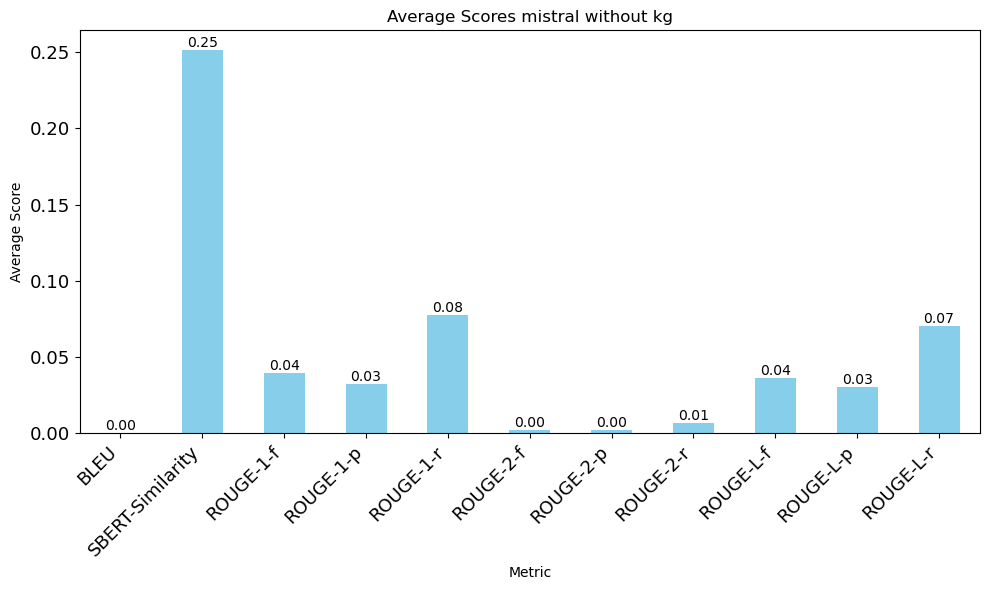

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file
output_file_path = 'C:/Users/crown/Desktop/ISE/praktikum docu/train_8/train_result_mistral_withoutkg.xlsx'
df = pd.read_excel(output_file_path)

# Specify the columns to calculate the mean
columns_to_mean = [
    'BLEU', 'SBERT-Similarity',
    'ROUGE-1-f', 'ROUGE-1-p', 'ROUGE-1-r',
    'ROUGE-2-f', 'ROUGE-2-p', 'ROUGE-2-r',
    'ROUGE-L-f', 'ROUGE-L-p', 'ROUGE-L-r'
]

# Calculate means
means = df[columns_to_mean].mean()

# Visualization
ax = means.plot(kind='bar', figsize=(10, 6), color='skyblue', fontsize=13)

plt.title('Average Scores mistral without kg')
plt.xlabel('Metric')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust subplot parameters to give specified padding

# Add values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), f'{i.get_height():.2f}', ha='center', va='bottom')

plt.show()
